In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
corona_all = pd.read_csv('./data/corona.csv', engine='python')

In [13]:
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,89083,2021-09-15,NaN,NaN,NaN,강서구,NaN,타시도 확진자 접촉,NaN,-,NaN,2021-09-16 9:55,2021-09-16 9:55,Y
1,89082,2021-09-15,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-16 9:55,2021-09-16 9:55,Y
2,89081,2021-09-15,NaN,NaN,NaN,타시도,NaN,타시도 확진자 접촉,NaN,-,NaN,2021-09-16 9:55,2021-09-16 9:55,Y
3,89080,2021-09-15,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-09-16 9:55,2021-09-16 9:55,Y
4,89079,2021-09-15,NaN,NaN,NaN,구로구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-09-16 9:55,2021-09-16 9:55,Y


In [14]:
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89083 entries, 0 to 89082
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      89083 non-null  int64  
 1   확진일     89083 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      89083 non-null  object 
 6   여행력     1659 non-null   object 
 7   접촉력     89083 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      89083 non-null  object 
 10  이동경로    0 non-null      float64
 11  등록일     89083 non-null  object 
 12  수정일     89083 non-null  object 
 13  노출여부    89083 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 9.5+ MB


In [20]:
corona_del_col = corona_all.drop(columns = ['국적', '환자번호', '이동경로', '환자정보', '조치사항'])

In [21]:
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89083 entries, 0 to 89082
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      89083 non-null  int64 
 1   확진일     89083 non-null  object
 2   지역      89083 non-null  object
 3   여행력     1659 non-null   object
 4   접촉력     89083 non-null  object
 5   상태      89083 non-null  object
 6   등록일     89083 non-null  object
 7   수정일     89083 non-null  object
 8   노출여부    89083 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.1+ MB


In [27]:
corona_del_col['확진일']

0        2021-09-15
1        2021-09-15
2        2021-09-15
3        2021-09-15
4        2021-09-15
            ...    
89078    2020-01-31
89079    2020-01-30
89080    2020-01-30
89081    2020-01-30
89082    2020-01-24
Name: 확진일, Length: 89083, dtype: object

In [51]:
month =[]
day = []

for data in corona_del_col['확진일']:
    month.append(data.split('-')[0])
    day.append(data.split('-')[1])

In [53]:
corona_del_col['year'] = month
corona_del_col['day'] = day

corona_del_col['year'].astype('int64')
# corona_del_col['day'].astype('int64')

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
89078    2020
89079    2020
89080    2020
89081    2020
89082    2020
Name: year, Length: 89083, dtype: int64

In [55]:
order = []
for i in range(1,3):
    order.append(str(i))

order

['1', '2']

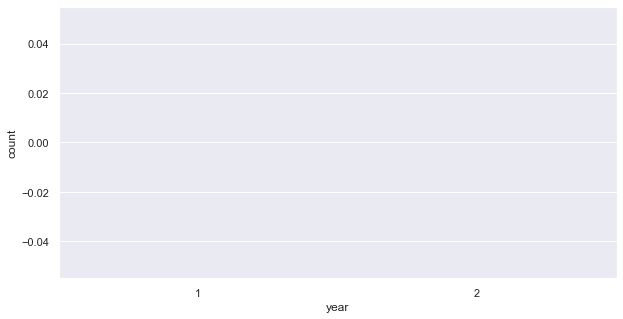

In [56]:
plt.figure(figsize=(10,5))

sns.set(style="darkgrid")
ax = sns.countplot(x="year", data=corona_del_col, palette="Set2", order = order)